In [2]:
# make dummy equation
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)



In [3]:
# Derive coefficients using the normal equation theta = (XTX)-1.(XTY)

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best


array([[4.30026274],
       [2.67178698]])

In [5]:
# Using pseudoinverse
np.linalg.pinv(X_b).dot(y)

array([[4.30026274],
       [2.67178698]])

<AxesSubplot:xlabel='Iteration'>

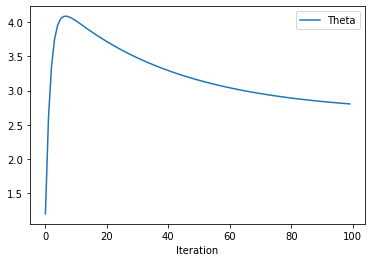

In [37]:
 # implementing through gradient descent
import pandas as pd 

eta = 0.1 # learning rate
n_iterations = 100
m = 100
theta_dic = {}
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_dic[iteration] = theta[1][0]
pd.DataFrame(theta_dic.items(),columns = ['Iteration','Theta']).set_index('Iteration').plot()

<AxesSubplot:xlabel='Iteration'>

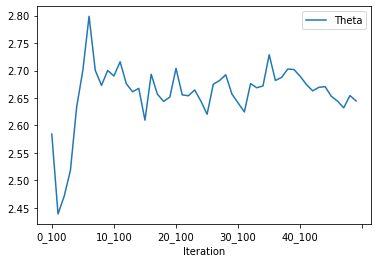

In [41]:
# Through stochastic gradient descent since m = 1 here; we are looping, so mse wouldnt contain the m term


n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
theta_dic = {}

# function to implement learning rate drop; as the iteration incraeses the rate decreases

def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_dic[str(epoch) + '_' + str(m)] = theta[1][0]
pd.DataFrame(theta_dic.items(),columns = ['Iteration','Theta']).set_index('Iteration').plot()
